# 分散・標準偏差
### 統計学における分散や標準偏差が表す意味を言葉だけでなくグラフなどで直感的に学ぶ

分散や標準偏差はデータのばらつきを表す指標であるが、どれほどの散らばりに対する評価なのかは感覚として分かりづらい。そのため今回は、サイコロを2回振り、それぞれの出た目の合計をグラフ化する。そしてそこから分散や標準偏差が何を評価しているかを理解する。

まずはサイコロを作成する。今回はダイスの目を配列で扱う。理由はのちに説明する。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
dice = [1, 2, 3, 4, 5, 6]

In [2]:
#2つのサイコロで1~6の目をランダムに10000回出す
num_trial = 10000
normal = np.random.choice(dice, num_trial)
normal2 = np.random.choice(dice, num_trial)

In [3]:
#2つの目の合計をnormalSとする
normalS = normal + normal2

6.9771


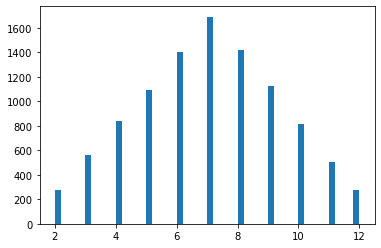

In [4]:
average = sum(normalS) / len(normalS)
print(average)
plt.hist(normalS, bins=50)
plt.show()

得られた平均値は6.9771になった。サイコロを2つ投げて出た目の和の平均値は7であるから、結果よりこのグラフはある程度正確であることが予想できる。
このグラフは綺麗な三角形をしている。平均値である7が出やすく、また7から同じだけ離れている2・12に近い値ほど、その値は出づらい。つまりこのグラフは偏りが無いグラフであることが分かる。
このグラフにおける分散や標準偏差は以下のようである。

In [5]:
#分散
np.var(normalS)

5.736175589999999

In [6]:
#標準偏差
np.sqrt(np.var(normalS,ddof=0))

2.3950314382070226

分散や標準偏差の値が分かったが、普段統計を使わない人に突然「この値がデータのばらつきを表している。」と説明してもやはり何を評価したものなのか分からないだろう。そこでもう1つグラフを作り、それと比較することにする。

今度は普通のサイコロではなく、出る目に偏りがあるイカサマのサイコロを作成する。得られる結果を変化させることで平均値や期待値の偏りも変化するのでそこに着目する。

In [7]:
#確率の設定。それぞれの目に対して配列の位置が対応している。ここでは６の目が8/21の確率で出ることとなる。
prob = [1/21, 1/21, 1/21, 5/21, 5/21, 8/21]
num_trial = 10000
ikasama = np.random.choice(dice, num_trial, p=prob)
ikasama2 = np.random.choice(dice, num_trial, p=prob)

In [8]:
ikasamaS = ikasama + ikasama2

9.4023


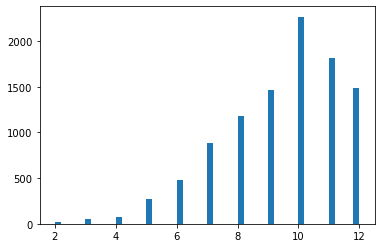

In [9]:
average = sum(ikasamaS) / len(ikasamaS)
print(average)
plt.hist(ikasamaS, bins=50)
plt.show()

得られた平均値は9.4023になった。イカサマサイコロを2つ投げて出る目の和の期待値は9.4であるから、結果よりこのグラフはある程度正確であることが予想できる。
このグラフは一目で偏りがあるグラフであることが分かる。明らかに7以上が出やすく、また2よりも12が出やすいことが一目で分かる。
このグラフにおける分散や標準偏差は以下のようである。

In [10]:
#分散
np.var(ikasamaS)

3.9694547100000004

In [11]:
#標準偏差
np.sqrt(np.var(ikasamaS,ddof=0))

1.9923490432150688

1個目のデータから得られた分散や標準偏差の値に比べ、こちらの値は小さくなったことが分かる。
このことから何が言えるか。さらに、比較しやすいように2つのグラフを重ねたものも作成してみる。

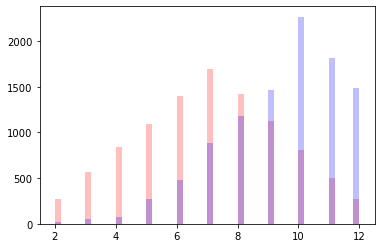

In [12]:
plt.figure()
plt.hist(normalS, bins=50, alpha=0.25, color='r')   # 普通のサイコロ
plt.hist(ikasamaS, bins=50, alpha=0.25, color='b')  # イカサマサイコロ
plt.show()

1個目のグラフは赤色(グラフA)、2個目のグラフは青色（グラフB）である。紫色は2つのグラフで重なっている部分である。
またグラフAの期待値は7、グラフBの期待値は9.4、であることを思い出して考える。
するとグラフBはグラフAよりも平均値によった値が多いことが分かる。

これを表現した値が分散なのである。データ全体としての平均値に偏りがあるかどうかを判断する値が分散なのである。平均値から離れた値が多ければ分散の値は大きくなり、また平均値に近い値が多ければ多いほど分散の値が小さくなるのである。
また分散はデータの二乗という単位である。これは抽象的なデータのばらつきを理解するのには良いが、より具体的にばらつきを理解したいときには向かない。そこで、データと同じ単位のばらつきの指標として標準偏差をとるである。